In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Q1) Implement a KNN model to classify the animals in to categorie
Dataset- Zoo

In [2]:
animals_data = pd.read_csv(r"C:\Users\shrut\Downloads\Zoo.csv")
animals_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# EDA
# Initial Analysis :

In [3]:
animals_data.shape

(101, 18)

In [4]:
animals_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
#Checking for NA values
animals_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
animals_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
animals_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

# Correlation Matrix :

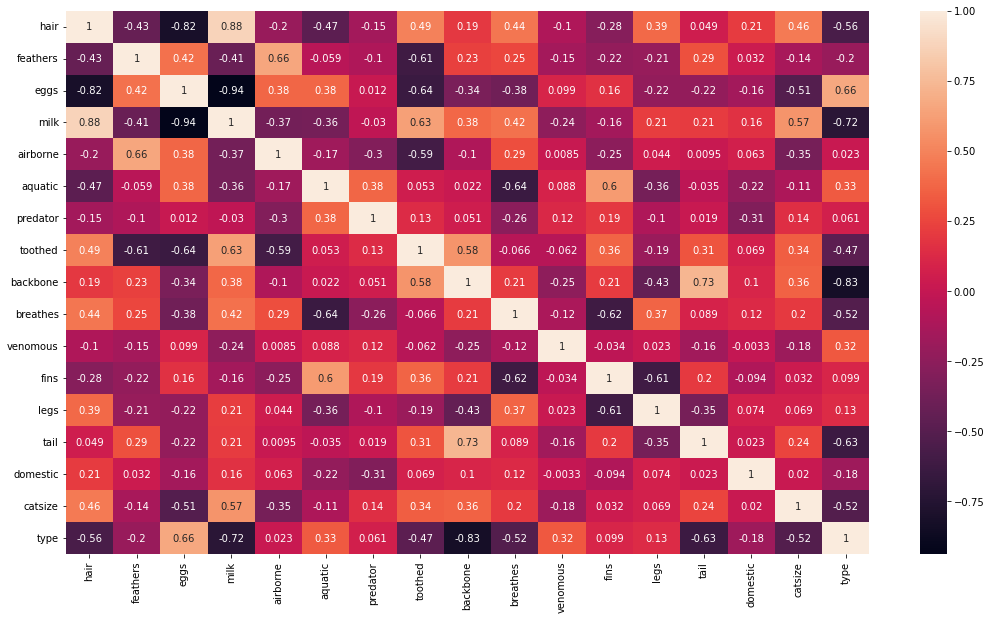

In [8]:
plt.figure(figsize = (18,10))
sns.heatmap(animals_data.corr(),annot = True)
plt.show()

# Perform Assumption Check

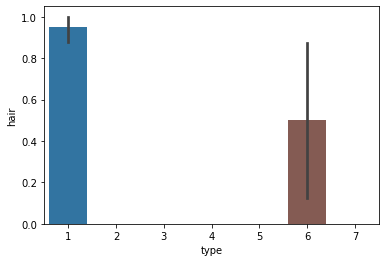

In [9]:
sns.barplot(x = 'type' , y = 'hair',data = animals_data)
plt.show()

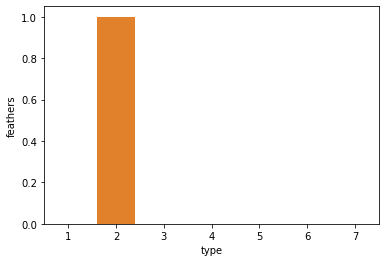

In [10]:
sns.barplot(x = 'type' , y = 'feathers',data = animals_data)
plt.show()

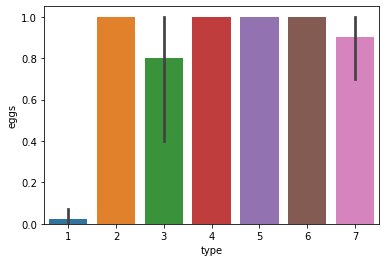

In [11]:
sns.barplot(x = 'type' , y = 'eggs',data = animals_data)
plt.show()

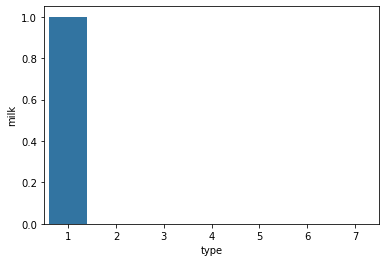

In [12]:
sns.barplot(x = 'type' , y = 'milk',data = animals_data)
plt.show()

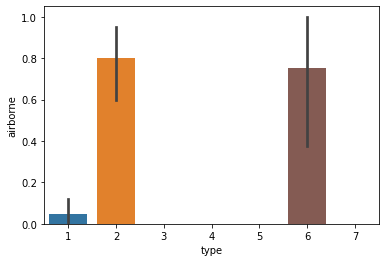

In [13]:
sns.barplot(x = 'type' , y = 'airborne',data = animals_data)
plt.show()

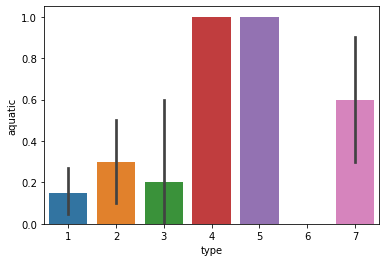

In [14]:
sns.barplot(x = 'type' , y = 'aquatic',data = animals_data)
plt.show()

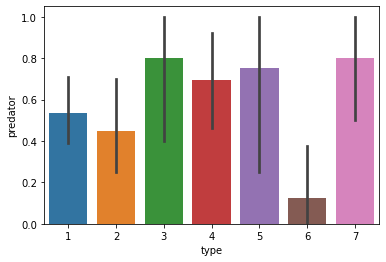

In [15]:
sns.barplot(x = 'type' , y = 'predator',data = animals_data)
plt.show()

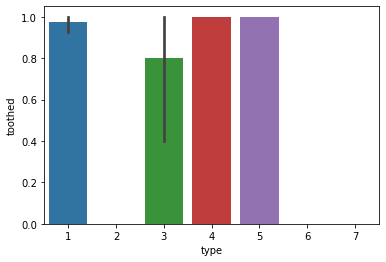

In [16]:
sns.barplot(x = 'type' , y = 'toothed',data = animals_data)
plt.show()

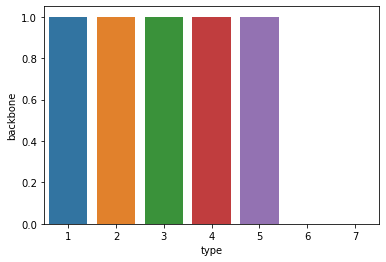

In [17]:
sns.barplot(x = 'type' , y = 'backbone',data = animals_data)
plt.show()

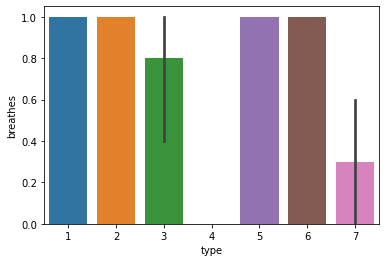

In [18]:
sns.barplot(x = 'type' , y = 'breathes',data = animals_data)
plt.show()

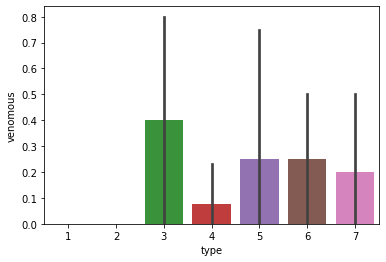

In [19]:
sns.barplot(x = 'type' , y = 'venomous',data = animals_data)
plt.show()

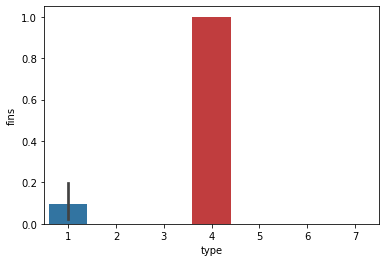

In [20]:
sns.barplot(x = 'type' , y = 'fins',data = animals_data)
plt.show()

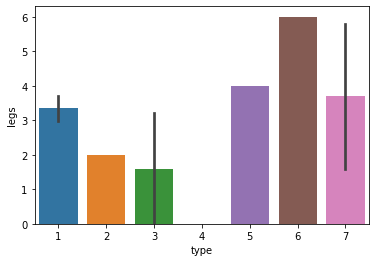

In [21]:
sns.barplot(x = 'type' , y = 'legs',data = animals_data)
plt.show()

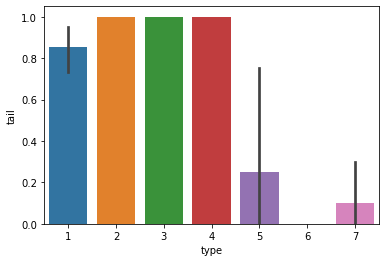

In [22]:
sns.barplot(x = 'type' , y = 'tail',data = animals_data)
plt.show()

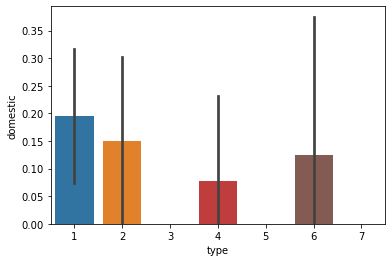

In [23]:
sns.barplot(x = 'type' , y = 'domestic',data = animals_data)
plt.show()

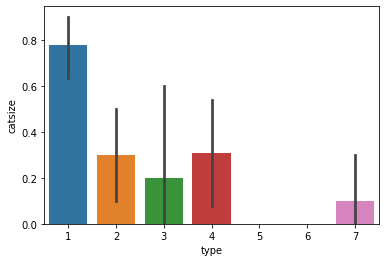

In [24]:
sns.barplot(x = 'type' , y = 'catsize',data = animals_data)
plt.show()

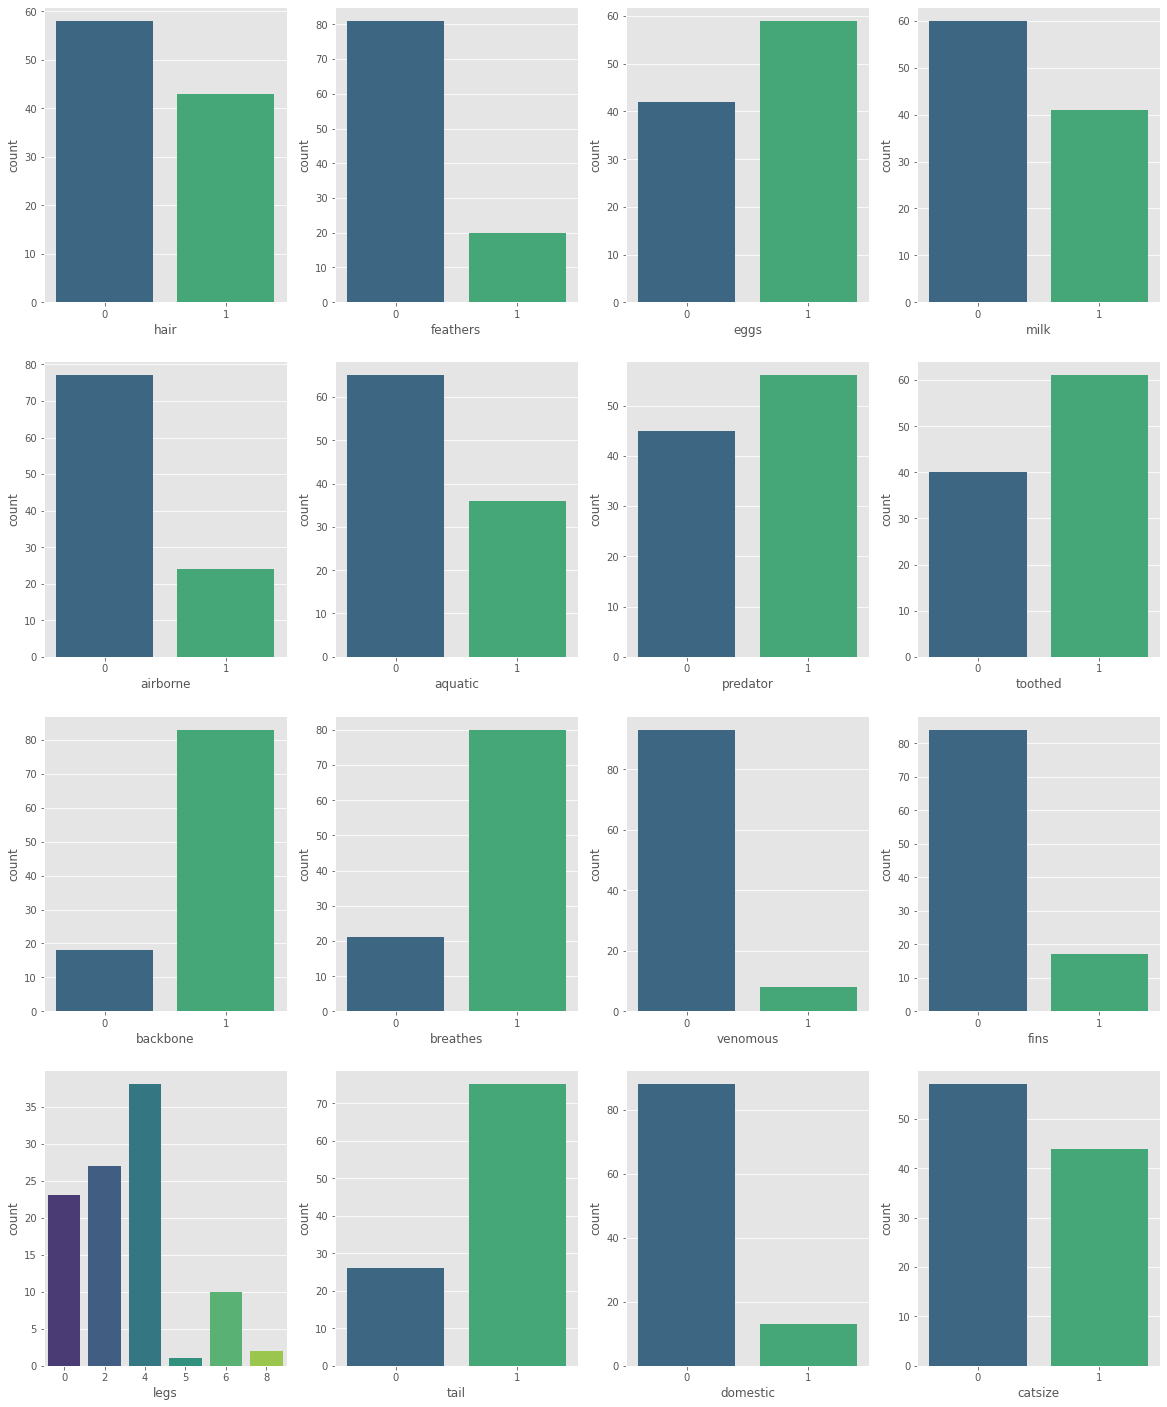

In [25]:
plt.style.use("ggplot")
fig, ax = plt.subplots(4,4, figsize = (20,25)) 

sns.countplot(animals_data['hair'], palette = 'viridis', ax = ax[0,0])
sns.countplot(animals_data['feathers'], palette = 'viridis', ax = ax[0,1])
sns.countplot(animals_data['eggs'], palette = 'viridis', ax = ax[0,2])
sns.countplot(animals_data['milk'], palette = 'viridis', ax = ax[0,3])

sns.countplot(animals_data['airborne'], palette = 'viridis', ax = ax[1,0])
sns.countplot(animals_data['aquatic'], palette = 'viridis', ax = ax[1,1])
sns.countplot(animals_data['predator'], palette = 'viridis', ax = ax[1,2])
sns.countplot(animals_data['toothed'], palette = 'viridis', ax = ax[1,3])

sns.countplot(animals_data['backbone'], palette = 'viridis', ax = ax[2,0])
sns.countplot(animals_data["breathes"], palette = 'viridis', ax = ax[2,1])
sns.countplot(animals_data["venomous"], palette = 'viridis', ax = ax[2,2])
sns.countplot(animals_data["fins"], palette = 'viridis', ax = ax[2,3])

sns.countplot(animals_data['legs'], palette = 'viridis', ax = ax[3,0])
sns.countplot(animals_data['tail'], palette = 'viridis', ax = ax[3,1])
sns.countplot(animals_data['domestic'], palette = 'viridis', ax = ax[3,2]);
sns.countplot(animals_data['catsize'], palette = 'viridis', ax = ax[3,3]);

# Train Test Split

In [26]:
animals_data_df = animals_data.drop('animal name', axis = 1)
animals_data_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [27]:
X = animals_data_df.drop('type', axis = 1)
y = animals_data_df['type']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [29]:
X_train.shape,X_test.shape

((75, 16), (26, 16))

In [30]:
y_test.shape,y_train.shape

((26,), (75,))

# KNN (K Neighrest Neighbour Classifier)

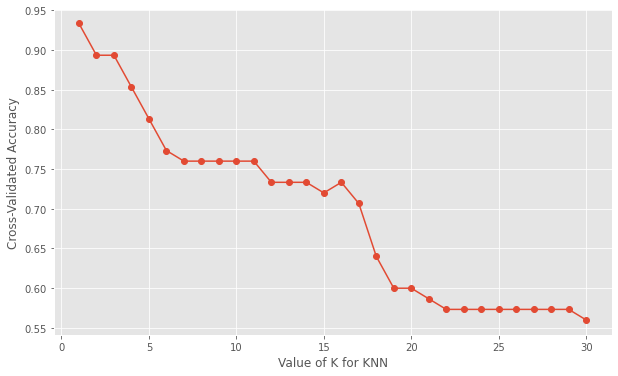

In [31]:
# choose k between 1 to 41
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    train_scores = cross_val_score(knn, X_train, y_train, cv = 5)
    k_scores.append(train_scores.mean())

plt.figure(figsize = (10,6))
plt.plot(k_range, k_scores,marker = "o")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Model

In [32]:
model = KNeighborsClassifier(n_neighbors = 5)
model

KNeighborsClassifier()

In [33]:
model_pred = model.fit(X_train,y_train).predict(X_train)
model_pred

array([1, 2, 4, 4, 4, 4, 5, 1, 6, 1, 4, 2, 1, 1, 1, 4, 6, 2, 1, 7, 1, 6,
       4, 1, 4, 2, 1, 4, 1, 1, 2, 1, 2, 5, 1, 1, 1, 2, 2, 7, 1, 1, 7, 1,
       1, 1, 1, 1, 7, 1, 2, 2, 7, 7, 5, 2, 7, 7, 6, 1, 2, 4, 5, 6, 1, 2,
       1, 2, 2, 1, 6, 1, 1, 1, 1], dtype=int64)

In [34]:
model_accuracy = model.score(X_test, y_test)
model_accuracy
print('Model accuracy is:',model_accuracy)

Model accuracy is: 0.9615384615384616


# Plot Confusion Matrix

In [35]:
cm_pred = model.predict(X_test)
cm = confusion_matrix(y_test, cm_pred)
cm

array([[10,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

In [36]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : cm_pred})
pred_df.head()

,Actual,Predicted
26,5,5
86,4,4
2,4,4
55,1,1
75,1,1


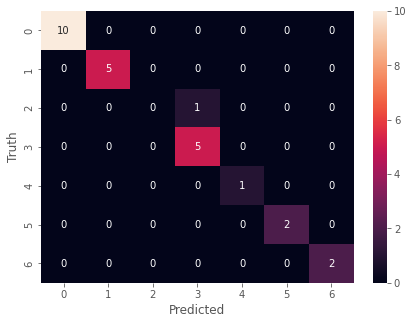

In [37]:
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Grid Search for Algorithm Tuning

In [39]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [40]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [41]:
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [42]:
print('The Best Score Accuracy :',grid.best_score_)
print('The Best Parameter  :',grid.best_params_)

The Best Score Accuracy : 0.9333333333333333
The Best Parameter  : {'n_neighbors': 1}


# Conclusion :

a) For KNN Model Accuracy of Animals is 0.9615 

b) The Grid Best Score Accuracy is 0.9333

# Q2)Prepare a model for glass classification using KNN
Dataset- Glass

In [43]:
glass_data = pd.read_csv(r"C:\Users\shrut\Downloads\glass.csv")
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA
# Initial Analysis:

In [44]:
glass_data.shape

(214, 10)

In [45]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [46]:
# Checking for NA values
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [47]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [48]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# Correlation Matrix

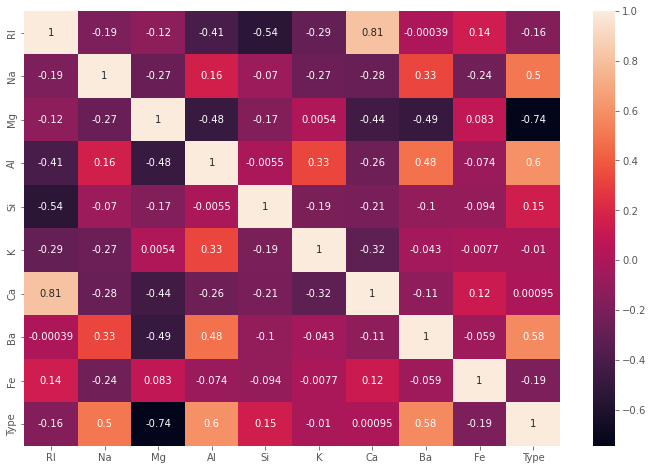

In [57]:
plt.figure(figsize = (12,8))
sns.heatmap(glass_data.corr(),annot = True)
plt.show()

# Perform Assumption Check

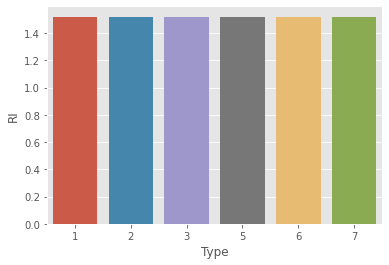

In [67]:
sns.barplot(x = 'Type' , y = 'RI',data = glass_data)
plt.show()

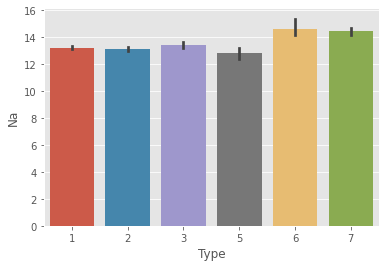

In [68]:
sns.barplot(x = 'Type' , y = 'Na',data = glass_data)
plt.show()

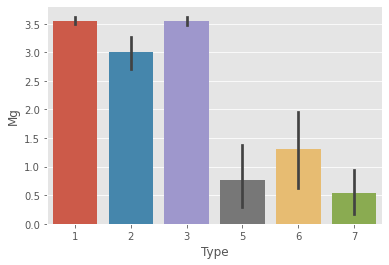

In [69]:
sns.barplot(x = 'Type' , y = 'Mg',data = glass_data)
plt.show()

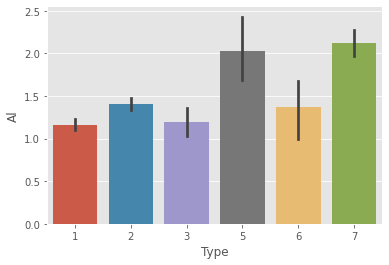

In [70]:
sns.barplot(x = 'Type' , y = 'Al',data = glass_data)
plt.show()

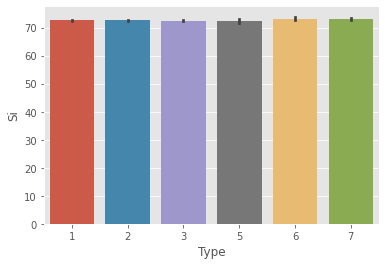

In [71]:
sns.barplot(x = 'Type' , y = 'Si',data = glass_data)
plt.show()

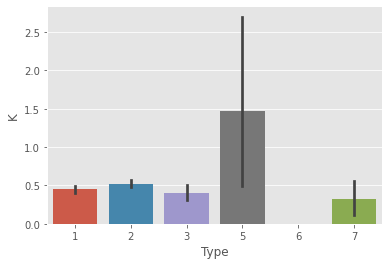

In [72]:
sns.barplot(x = 'Type' , y = 'K',data = glass_data)
plt.show()

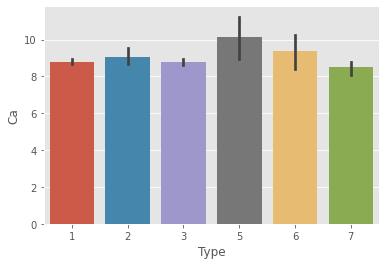

In [73]:
sns.barplot(x = 'Type' , y = 'Ca',data = glass_data)
plt.show()

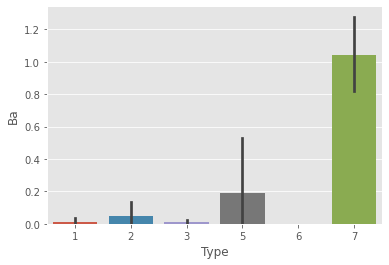

In [74]:
sns.barplot(x = 'Type' , y = 'Ba',data = glass_data)
plt.show()

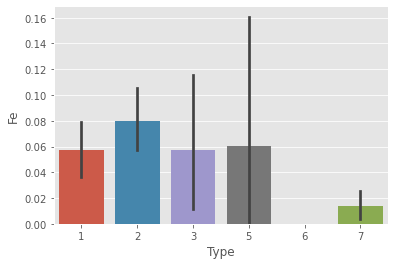

In [75]:
sns.barplot(x = 'Type' , y = 'Fe',data = glass_data)
plt.show()

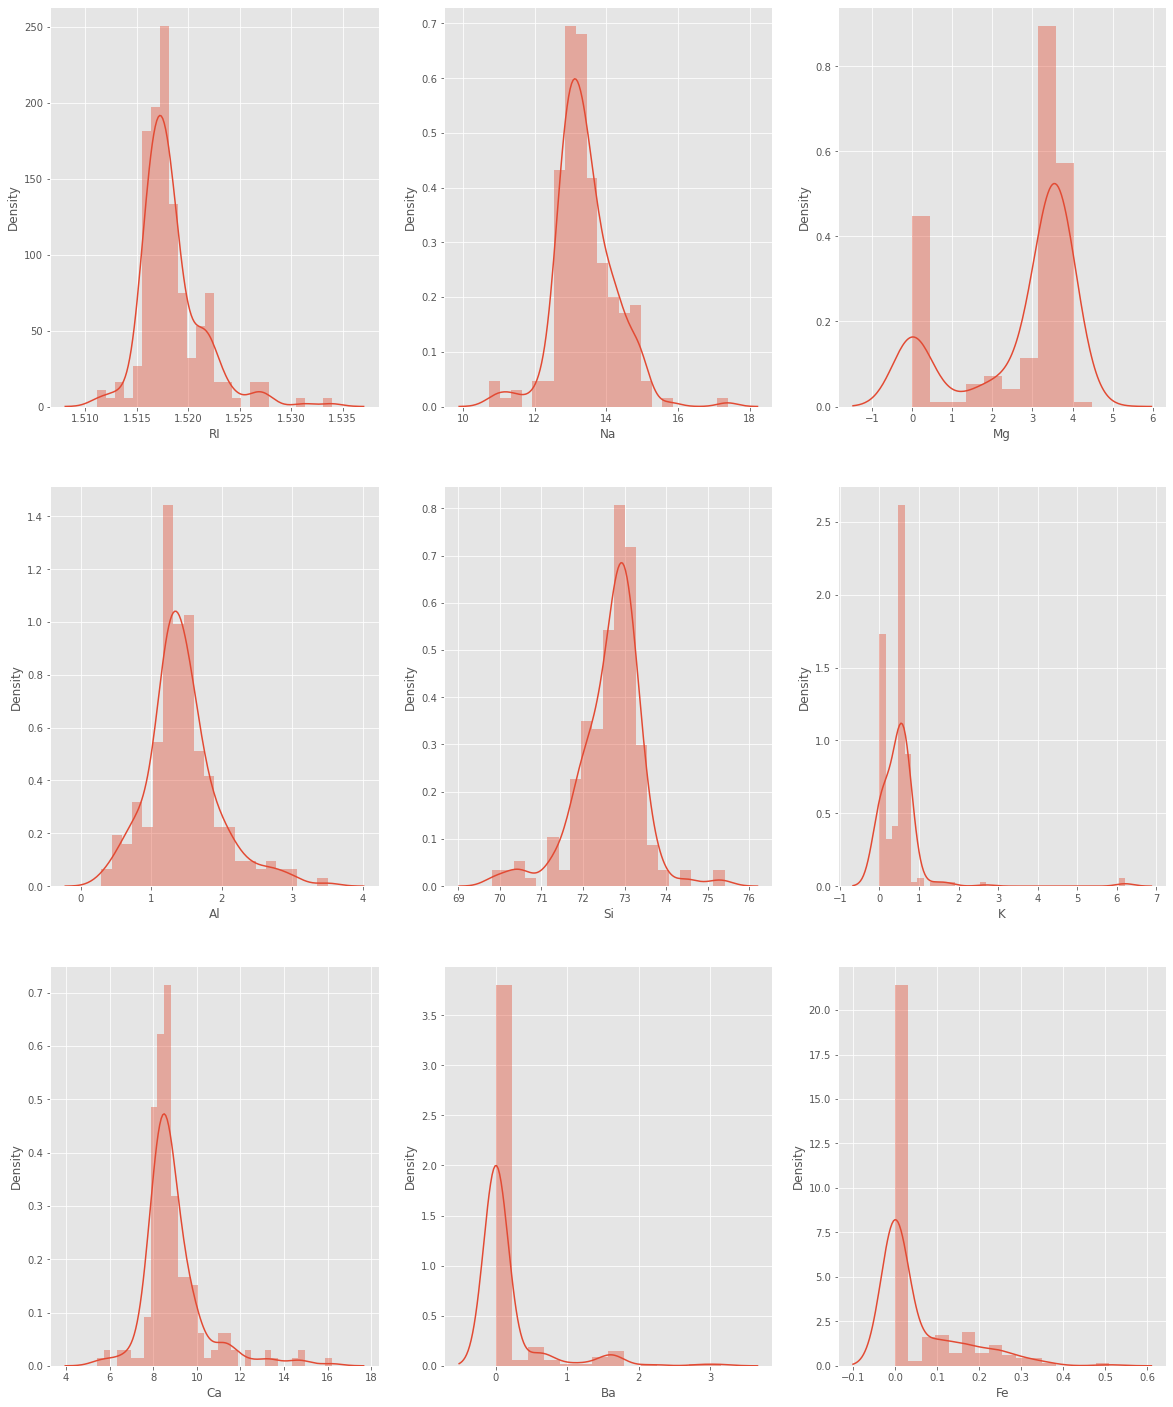

In [76]:
plt.style.use("ggplot")
fig, ax = plt.subplots(3,3, figsize = (20,25)) 

sns.distplot(glass_data['RI'], ax = ax[0,0])
sns.distplot(glass_data['Na'], ax = ax[0,1])
sns.distplot(glass_data['Mg'], ax = ax[0,2])

sns.distplot(glass_data['Al'], ax = ax[1,0])
sns.distplot(glass_data['Si'], ax = ax[1,1])
sns.distplot(glass_data['K'],  ax = ax[1,2])

sns.distplot(glass_data['Ca'], ax = ax[2,0])
sns.distplot(glass_data['Ba'], ax = ax[2,1])
sns.distplot(glass_data['Fe'], ax = ax[2,2])
plt.show()

# Train Test Split

In [77]:
X = glass_data.drop('Type', axis = 1)
y = glass_data['Type']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

In [79]:
X_train.shape,X_test.shape

((149, 9), (65, 9))

In [80]:
y_test.shape,y_train.shape

((65,), (149,))

# KNN (K Neighrest Neighbour Classifier)

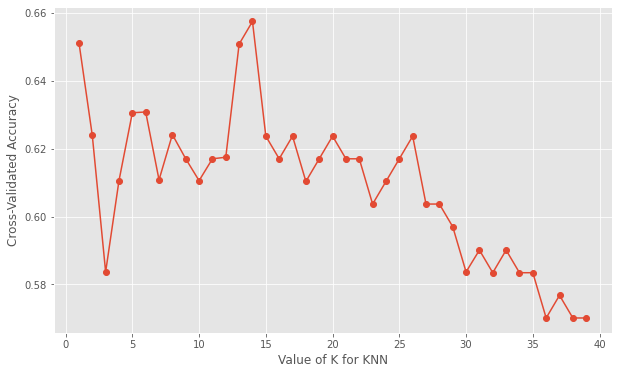

In [81]:
k_range = range(1, 40)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    train_scores = cross_val_score(knn, X_train, y_train, cv = 5)
    k_scores.append(train_scores.mean())

plt.figure(figsize = (10,6))
plt.plot(k_range, k_scores,marker = "o")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Model

In [82]:
model = KNeighborsClassifier(n_neighbors = 2)
model

KNeighborsClassifier(n_neighbors=2)

In [83]:
model_pred = model.fit(X_train,y_train).predict(X_train)
model_pred

array([2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 5, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 3, 2, 2, 2, 2, 1, 7, 1, 1, 2, 2, 1, 1, 7, 6, 1, 1,
       2, 7, 3, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 6, 1, 7, 1, 1, 5, 1, 1,
       2, 1, 2, 1, 5, 1, 2, 1, 7, 1, 1, 5, 1, 1, 1, 2, 1, 2, 7, 5, 7, 1,
       2, 1, 1, 2, 1, 2, 7, 7, 1, 1, 1, 1, 2, 2, 1, 5, 2, 7, 1, 6, 7, 1,
       1, 2, 1, 2, 7, 2, 1, 1, 2, 1, 1, 3, 7, 3, 2, 1, 1, 5, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 7, 2, 2, 7, 1, 2, 2, 2, 1, 2, 6, 2], dtype=int64)

In [84]:
model_accuracy = model.score(X_test, y_test)
model_accuracy
print('Model accuracy is:',model_accuracy)

Model accuracy is: 0.6615384615384615


# Plot Confusion Matrix

In [85]:
cm_pred = model.predict(X_test)
cm = confusion_matrix(y_test, cm_pred)
cm

array([[16,  2,  1,  0,  0,  0],
       [ 7, 12,  1,  1,  2,  0],
       [ 2,  1,  1,  0,  0,  0],
       [ 0,  2,  0,  4,  0,  0],
       [ 0,  1,  0,  0,  2,  0],
       [ 0,  1,  0,  0,  1,  8]], dtype=int64)

In [86]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : cm_pred})
pred_df.head()

,Actual,Predicted
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2


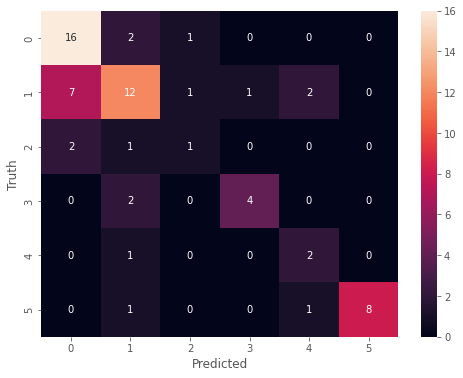

In [87]:
plt.figure(figsize = (8,6))

sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Grid Search for Algorithm Tuning

In [88]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [89]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [90]:
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [91]:
print('The Best Score Accuracy :',grid.best_score_)
print('The Best Parameter  :',grid.best_params_)

The Best Score Accuracy : 0.657471264367816
The Best Parameter  : {'n_neighbors': 14}


# Conclusion : 

a) For KNN Model Accuracy of GLASS is 0.6615

b) The Grid Best Score Accuracy is 0.6574